MNIST
   - 255. 표준화
   - 28*28 rehshape
   - 이미지에 노이즈 추가

일반화

신경망 하이퍼 파라메터 튜닝


In [1]:
import tensorflow as tf
import numpy as np
(train_images,train_labels),(test_imagees,test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1,28*28)
train_images = train_images.astype('float32') / 255.
test_imagees = test_imagees.reshape(-1,28*28)
test_imagees = test_imagees.astype('float32') / 255.

train_images_with_noise = np.concatenate([train_images, np.random.random( (len(train_images),784) )], axis=1 )
train_images_with_zeros = np.concatenate([train_images, np.zeros((len(train_images),784) )], axis=1 )

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras import Sequential
def getmodel():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer='rmsprop',loss = tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
    return model

model = getmodel()
hist_noise = model.fit(train_images_with_noise, train_labels,epochs=10,batch_size=128,validation_split=0.2)
hist_zero = model.fit(train_images_with_zeros, train_labels,epochs=10,batch_size=128,validation_split=0.2)

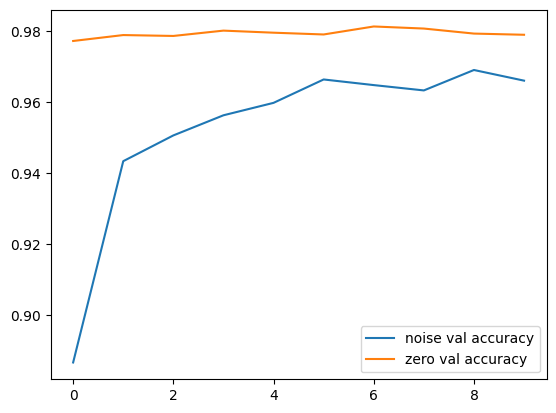

In [4]:
import matplotlib.pyplot as plt
plt.plot(hist_noise.history['val_accuracy'],label = 'noise val accuracy')
plt.plot(hist_zero.history['val_accuracy'],label = 'zero val accuracy')
plt.legend()
plt.show()

In [5]:
# 정답데이터를 복사
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)
model = getmodel()
hist = model.fit(train_images, random_train_labels,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 2.3145 - accuracy: 0.1041 - val_loss: 2.3047 - val_accuracy: 0.1098
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 2.2991 - accuracy: 0.1173 - val_loss: 2.3116 - val_accuracy: 0.1017
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2904 - accuracy: 0.1274 - val_loss: 2.3169 - val_accuracy: 0.1044
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 2.2788 - accuracy: 0.1369 - val_loss: 2.3245 - val_accuracy: 0.1002
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 2.2634 - accuracy: 0.1517 - val_loss: 2.3359 - val_accuracy: 0.1059
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2440 - accuracy: 0.1648 - val_loss: 2.3467 - val_accuracy: 0.1091
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 2.2209 - accuracy: 0.1773 - val_loss: 2.3503 - val_accuracy: 0.1028

훈련성능 향상

In [12]:
(train_images,train_labels),(test_imagees,test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1,28*28)
train_images = train_images.astype('float32') / 255.
test_imagees = test_imagees.reshape(-1,28*28)
test_imagees = test_imagees.astype('float32') / 255.

def getmodel(opt):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer=opt,loss = tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
    return model

In [13]:
opt = tf.keras.optimizers.RMSprop(learning_rate=1.)
model = getmodel(opt)
hist = model.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 15ms/step - loss: 481.9367 - accuracy: 0.2869 - val_loss: 2.4020 - val_accuracy: 0.1443
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 2.8155 - accuracy: 0.1562 - val_loss: 2.3505 - val_accuracy: 0.1459
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4724 - accuracy: 0.1323 - val_loss: 2.3758 - val_accuracy: 0.1308
Epoch 4/10
375/375 [==============================] - 7s 18ms/step - loss: 2.4190 - accuracy: 0.1388 - val_loss: 2.4148 - val_accuracy: 0.1545
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 2.3856 - accuracy: 0.1516 - val_loss: 2.2991 - val_accuracy: 0.1612
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 2.5646 - accuracy: 0.1733 - val_loss: 2.2470 - val_accuracy: 0.1852
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 2.4229 - accuracy: 0.1723 - val_loss: 2.2902 - val_accuracy: 0.16

In [14]:
opt = tf.keras.optimizers.RMSprop(learning_rate=1e-2)
model = getmodel(opt)
hist = model.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.3594 - accuracy: 0.9121 - val_loss: 0.1479 - val_accuracy: 0.9589
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1270 - accuracy: 0.9643 - val_loss: 0.1412 - val_accuracy: 0.9650
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0965 - accuracy: 0.9743 - val_loss: 0.1460 - val_accuracy: 0.9683
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0811 - accuracy: 0.9797 - val_loss: 0.1748 - val_accuracy: 0.9661
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0653 - accuracy: 0.9834 - val_loss: 0.1570 - val_accuracy: 0.9696
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0568 - accuracy: 0.9859 - val_loss: 0.1717 - val_accuracy: 0.9713
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0544 - accuracy: 0.9867 - val_loss: 0.1637 - val_accuracy: 0.9753

In [16]:
opt = tf.keras.optimizers.RMSprop(learning_rate=1e-7)
model = getmodel(opt)
hist = model.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 2.4157 - accuracy: 0.1165 - val_loss: 2.4056 - val_accuracy: 0.1185
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4047 - accuracy: 0.1206 - val_loss: 2.3947 - val_accuracy: 0.1234
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 2.3939 - accuracy: 0.1247 - val_loss: 2.3840 - val_accuracy: 0.1283
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 2.3833 - accuracy: 0.1280 - val_loss: 2.3733 - val_accuracy: 0.1338
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 2.3727 - accuracy: 0.1325 - val_loss: 2.3628 - val_accuracy: 0.1388
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 2.3622 - accuracy: 0.1369 - val_loss: 2.3523 - val_accuracy: 0.1423
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 2.3519 - accuracy: 0.1407 - val_loss: 2.3420 - val_accuracy: 0.1480

모델용량 늘리기

In [18]:
def getmodel(opt):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer=opt,loss = tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
    return model
opt = tf.keras.optimizers.RMSprop(learning_rate=1e-2)
model = getmodel(opt)
hist = model.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 34s 6ms/step - loss: 0.4171 - accuracy: 0.8733 - val_loss: 0.2457 - val_accuracy: 0.9252
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1771 - accuracy: 0.9496 - val_loss: 0.1305 - val_accuracy: 0.9653
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1395 - accuracy: 0.9618 - val_loss: 0.1448 - val_accuracy: 0.9663
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1255 - accuracy: 0.9678 - val_loss: 0.1688 - val_accuracy: 0.9606
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1142 - accuracy: 0.9709 - val_loss: 0.1667 - val_accuracy: 0.9614
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1049 - accuracy: 0.9733 - val_loss: 0.2177 - val_accuracy: 0.9573
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1079 - accuracy: 0.9730 - val_loss: 0.1508 - val_accuracy: 0.9682
Epoch

In [ ]:
def getmodel(opt):
    regularizers = tf.keras.regularizers
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(l2=0.001)),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer=opt,loss = tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
    return model
est = tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
opt = tf.keras.optimizers.RMSprop(learning_rate=1e-2)
model = getmodel(opt)
hist = model.fit(train_images,train_labels,epochs=1000,batch_size=128,validation_split=0.2,callbacks=[est])

Epoch 1/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.5292 - accuracy: 0.8594 - val_loss: 0.3771 - val_accuracy: 0.9084
Epoch 2/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.3832 - accuracy: 0.9086 - val_loss: 0.3548 - val_accuracy: 0.9180
Epoch 3/1000
375/375 [==============================] - 1s 3ms/step - loss: 0.3639 - accuracy: 0.9150 - val_loss: 0.3429 - val_accuracy: 0.9184
Epoch 4/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.3570 - accuracy: 0.9178 - val_loss: 0.3269 - val_accuracy: 0.9258
Epoch 5/1000
375/375 [==============================] - 2s 5ms/step - loss: 0.3499 - accuracy: 0.9194 - val_loss: 0.2979 - val_accuracy: 0.9367
Epoch 6/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.3476 - accuracy: 0.9211 - val_loss: 0.3074 - val_accuracy: 0.9340
Epoch 7/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.3442 - accuracy: 0.9211 - val_loss: 0.3320 - val_accuracy: